In [1]:
# Importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

# Import Data

In [2]:
# display all rows and columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)

In [3]:
# read the dataset
leads = pd.read_csv("/Users/biplab/Downloads/Lead Scoring Assignment/Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Data Inspection 

In [4]:
#shape of the dataset
leads.shape

(9240, 37)

In [5]:
# checking all columns' datatypes
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

All datatypes are consistent, hence no conversion is required.

In [6]:
# Statistical summary of the dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### We can see that "TotalVisits", "Total Time Spent on Website", and "Page Views Per Visit" are having Outliers as min and max values are significantly different.

In [7]:
# Checking null values present in every columns
null_percentage = round((leads.isnull().sum()*100/len(leads)),2)
print(null_percentage)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
# Checking duplicates

duplicate_mask = leads.duplicated(subset=None, keep='first')
duplicates = leads[duplicate_mask]
print(duplicates)

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []


As we can see, there is no duplicate value found in the dataset.

#### There are lots of cell filled with "Select" value, as we confirmed that Lead didn't filled that level and left as it is. Let's find out how many columns are having "Select" level filled with. Hence, We need to identify and replace with np.nan values.

In [9]:
# Finding column names in which 'Select' level is available:-

cols=list(leads.columns)
select_cols = []

for col in cols:
    if 'Select' in leads[col].values:
        select_cols.append(col)

print(select_cols)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [10]:
# Lets check the identified columns

leads[select_cols].head()

,Specialization,How did you hear about X Education,Lead Profile,City
0,Select,Select,Select,Select
1,Select,Select,Select,Select
2,Business Administration,Select,Potential Lead,Mumbai
3,Media and Advertising,Word Of Mouth,Select,Mumbai
4,Select,Other,Select,Mumbai


In [11]:
# Check traget column

leads["Converted"].value_counts()


0    5679
1    3561
Name: Converted, dtype: int64

# Data Cleaning

#### "Select" level is present in four columns, We can convert these into "Null" values.

In [12]:
# Iterate through the identified columns and replace "Select" with np.nan

for col in select_cols:
    leads[col] = leads[col].replace("Select",np.nan)
    
leads[select_cols].head() # Dataset after replacing into null values

,Specialization,How did you hear about X Education,Lead Profile,City
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,Business Administration,NaN,Potential Lead,Mumbai
3,Media and Advertising,Word Of Mouth,NaN,Mumbai
4,NaN,Other,NaN,Mumbai


#### Checking Missing values in every columns

In [13]:
null_percentage = round((leads.isnull().sum()*100/len(leads)),2)

null_percentage.sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

#### There are many columns are having missing values.
#### Currently we are going to drop columns which are having more than 40% of missing data as it will not impact our analysis further.

In [14]:
# Missing values columns(>40%) 

list(leads.columns[null_percentage > 40])

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [15]:
# removing null values 
leads = leads.loc[:,leads.isnull().mean() < 0.40]
round((leads.isnull().sum()*100/len(leads)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### Few of the columns are still having missing values, lets analyze them.

In [16]:
Country = round(leads['Country'].value_counts(normalize=True),2)*100
Specialization = round(leads['Specialization'].value_counts(normalize=True),2)*100
Occupation = round(leads['What is your current occupation'].value_counts(normalize=True),2)*100
Course_reason = round(leads['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100
Tags = round(leads['Tags'].value_counts(normalize=True),2)*100
City = round(leads['City'].value_counts(normalize=True),2)*100

In [17]:
print(Country)

India                   96.0
United States            1.0
United Arab Emirates     1.0
Singapore                0.0
Saudi Arabia             0.0
United Kingdom           0.0
Australia                0.0
Qatar                    0.0
Hong Kong                0.0
Bahrain                  0.0
Oman                     0.0
France                   0.0
unknown                  0.0
South Africa             0.0
Nigeria                  0.0
Germany                  0.0
Kuwait                   0.0
Canada                   0.0
Sweden                   0.0
China                    0.0
Asia/Pacific Region      0.0
Uganda                   0.0
Bangladesh               0.0
Italy                    0.0
Belgium                  0.0
Netherlands              0.0
Ghana                    0.0
Philippines              0.0
Russia                   0.0
Switzerland              0.0
Vietnam                  0.0
Denmark                  0.0
Tanzania                 0.0
Liberia                  0.0
Malaysia      

In [18]:
# Since most of the leads belong to India, we can impute missing values with "India".

leads["Country"] = leads["Country"].replace(np.nan,"India")

In [19]:
print(Specialization)

Finance Management                   17.0
Human Resource Management            14.0
Marketing Management                 14.0
Operations Management                 9.0
Business Administration               7.0
IT Projects Management                6.0
Supply Chain Management               6.0
Banking, Investment And Insurance     6.0
Travel and Tourism                    3.0
Media and Advertising                 3.0
International Business                3.0
Healthcare Management                 3.0
Hospitality Management                2.0
E-COMMERCE                            2.0
Retail Management                     2.0
Rural and Agribusiness                1.0
E-Business                            1.0
Services Excellence                   1.0
Name: Specialization, dtype: float64


######  Almost 37% of missing values in Specialization column, this could be the reason of something else or that particular work area didn't mentioned here. So, We can filled it with "Others"

In [20]:
leads["Specialization"] = leads["Specialization"].replace(np.nan,"Others")

In [21]:
print(Occupation)

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64


#### Almost 30% "Current Occupation" columns are null and most of the filled cells with "Unemployed", so we can impute this "Unemployed" value in np.nan cells for a better understanding.

In [22]:
leads["What is your current occupation"] = leads["What is your current occupation"].replace(np.nan,"Unemployed")

In [23]:
print(Course_reason)

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64


#### We can drop "What matters most to you in choosing a course" column as this is highly skewed column.

In [24]:
leads = leads.drop ("What matters most to you in choosing a course", axis=1)

In [25]:
print(Tags) 

Will revert after reading the email                  35.0
Ringing                                              20.0
Interested in other courses                           9.0
Already a student                                     8.0
Closed by Horizzon                                    6.0
switched off                                          4.0
Busy                                                  3.0
Lost to EINS                                          3.0
Not doing further education                           2.0
Interested  in full time MBA                          2.0
Graduation in progress                                2.0
invalid number                                        1.0
Diploma holder (Not Eligible)                         1.0
wrong number given                                    1.0
opp hangup                                            1.0
number not provided                                   0.0
in touch with EINS                                    0.0
Lost to Others

#### Imputing Tags' missing values with "Will revert after reading the email" as this is most frequent. This is also a good idea to send a brief about the course details in "Mail" for better understanding.

In [26]:
leads["Tags"] = leads["Tags"].replace(np.nan,"Will revert after reading the email")

In [27]:
print(City)

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64


#### City shows most of the leads from Mumbai and surrounding of Mumbai locations, so better to keep "Mumbai" in np.nan values.

In [28]:
leads["City"] = leads["City"].replace(np.nan,"Mumbai")

#### After removing and filled the missing values, lets check the null percentages.

In [29]:
null_percentage = round((leads.isnull().sum()*100/len(leads)),2)

null_percentage.sort_values(ascending=False)


TotalVisits                                 1.48
Page Views Per Visit                        1.48
Last Activity                               1.11
Lead Source                                 0.39
Prospect ID                                 0.00
X Education Forums                          0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
City                                        0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Tags                                        0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
Search                                      0.00
Newspaper Article                           0.00
Magazine                                    0.00
Lead Number                                 0.00
What is your current

#### Only 3 columns are having 1% each missing values, so we can remove these rows.

In [30]:
leads.dropna(inplace=True)

In [31]:
null_percentage = round((leads.isnull().sum()*100/len(leads)),2)

null_percentage.sort_values(ascending=False)


Prospect ID                                 0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Search                                      0.0
Lead Number                                 0.0
What is your current occupation             0.0
Specialization                              0.0
Country                                     0.0
Last Activity                               0.0
Page Views Per Visit                    

#### Currently no missing values are visible, and we are good to go with EDA (Exploratory Data Analysis).

# EDA

In [32]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


### Data Imbalanced Variables 

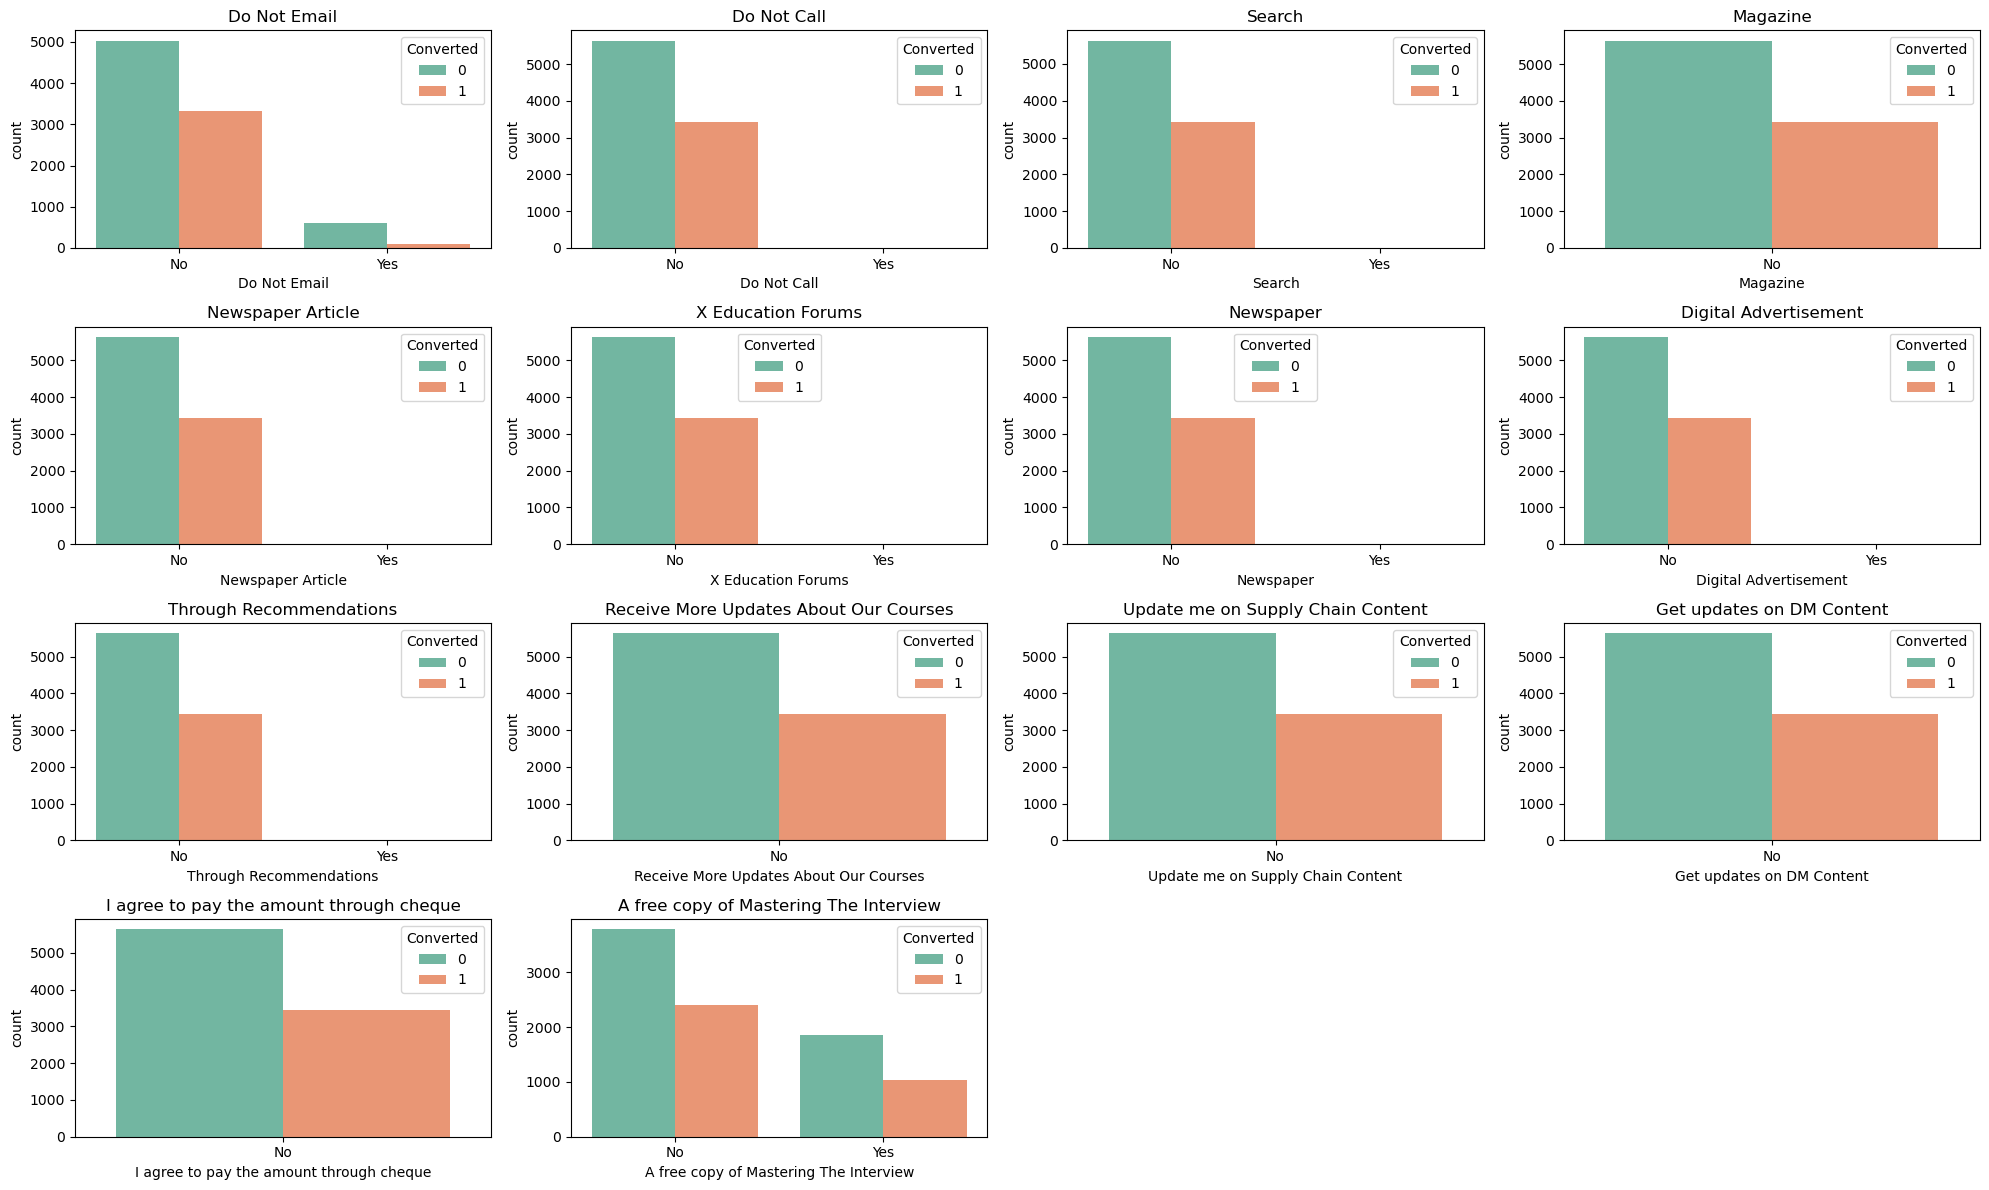

In [33]:
## Visualizing categorical variables (contains yes/no) for data imbalance

categorical_vars = [
    "Do Not Email", "Do Not Call", "Search", "Magazine",
    "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement",
    "Through Recommendations", "Receive More Updates About Our Courses",
    "Update me on Supply Chain Content", "Get updates on DM Content",
    "I agree to pay the amount through cheque", "A free copy of Mastering The Interview"
]

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 12))

# Iterate through the categorical variables and plot them in the subplots
for i, j in enumerate(categorical_vars):
    row = i // 4  
    col = i % 4   
    sns.countplot(x=j, hue="Converted", data=leads, palette='Set2', ax=axes[row, col])
    axes[row, col].set_title(j)

# Remove any remaining empty subplots
for i in range(len(categorical_vars), 4 * 4):
    row = i // 4
    col = i % 4
    fig.delaxes(axes[row, col])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


#### Apart from "A free copy of Mastering The Interview" and "Do Not Email", other columns are highly imbalanced. So, We can drop these for further analysis.

In [34]:
cols_drop = ["Do Not Call", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement","Through Recommendations", "Receive More Updates About Our Courses","Update me on Supply Chain Content", "Get updates on DM Content","I agree to pay the amount through cheque"]


leads.drop(columns=cols_drop, inplace=True)


In [35]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Interested in other courses,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [36]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation', 'Tags',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

## Univariate analysis

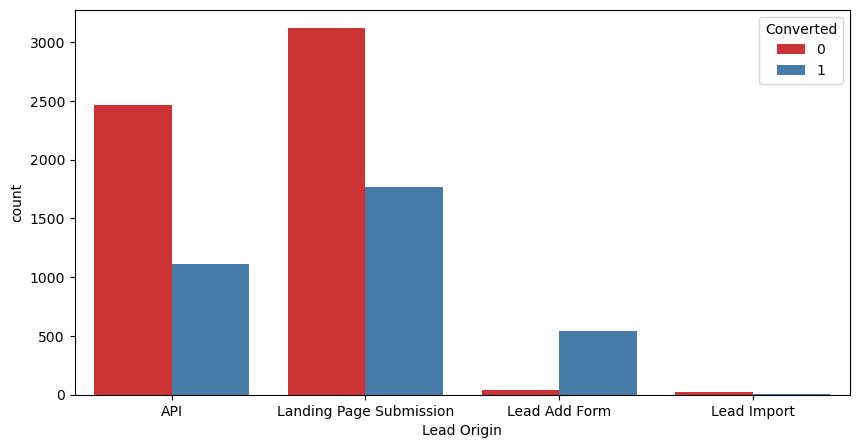

In [37]:
# Let's visualize "Lead Origin" Column to make some inferences
plt.figure(figsize = (10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads,palette = 'Set1')
plt.show()

In [38]:
value_counts = leads['Lead Origin'].value_counts()
percentages = (value_counts / len(leads)) * 100
print(percentages)

Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: Lead Origin, dtype: float64


#### Inference : To improve lead conversion rate, we need to prioritize on "API" and "Landing Page Submission" origins to generate more leads.

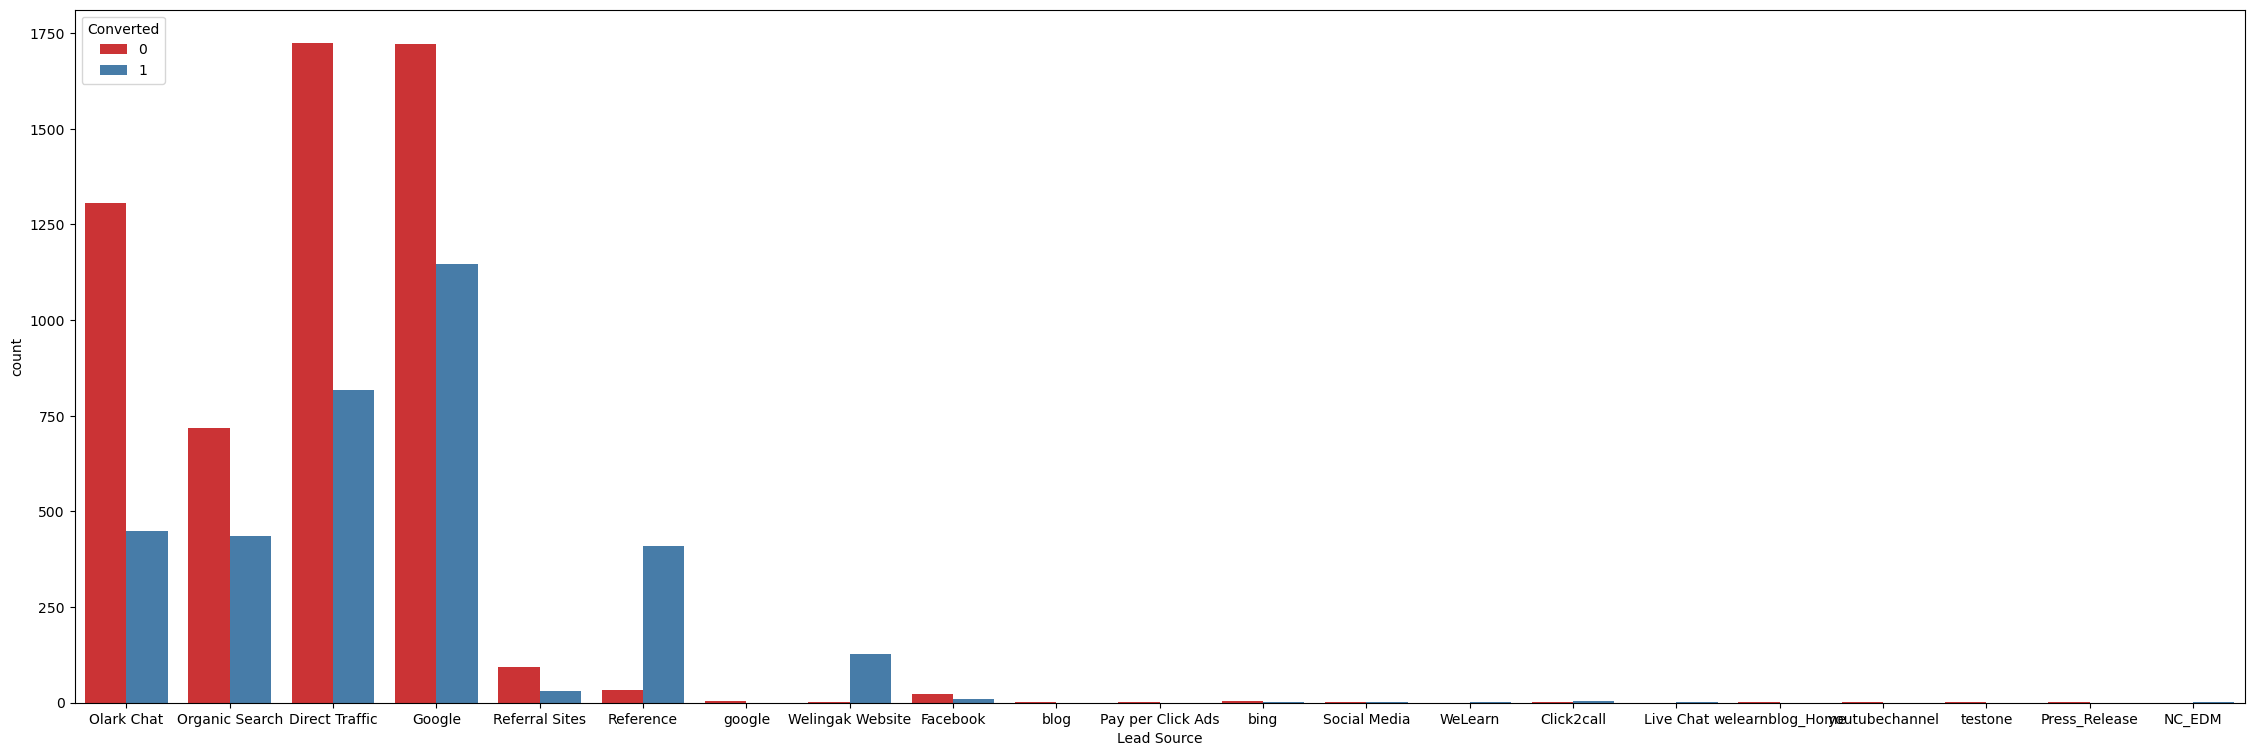

In [39]:
# Let's visualize Lead "Lead Source" to make some inferences
plt.figure(figsize = (28,9))
sns.countplot(x = 'Lead Source', hue = "Converted", data = leads,palette = 'Set1')
plt.show()

In [40]:
value_counts = leads['Lead Source'].value_counts()
percentages = (value_counts / len(leads)) * 100
print(percentages)

Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Press_Release         0.022041
Social Media          0.022041
Live Chat             0.022041
youtubechannel        0.011020
testone               0.011020
Pay per Click Ads     0.011020
welearnblog_Home      0.011020
WeLearn               0.011020
blog                  0.011020
NC_EDM                0.011020
Name: Lead Source, dtype: float64


#### Inference : To improve the lead conversion rate, Team should focus on Google, Direct Traffic, Olark Chat, Organic Search, and References. Where Google, Direct Traffic, and Olark Chat are the top three platform to get more lead conversions.

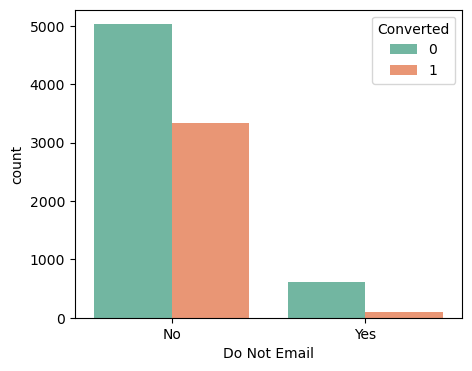

In [41]:
# Visualize "Do not Email" Column to make some inferences
plt.figure(figsize = (5,4))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads,palette = 'Set2')
plt.show()

#### Inference : We can't inference anything as most of the values are belongs to "No". We can drop this column.

In [42]:
leads = leads.drop("Do Not Email",axis=1)

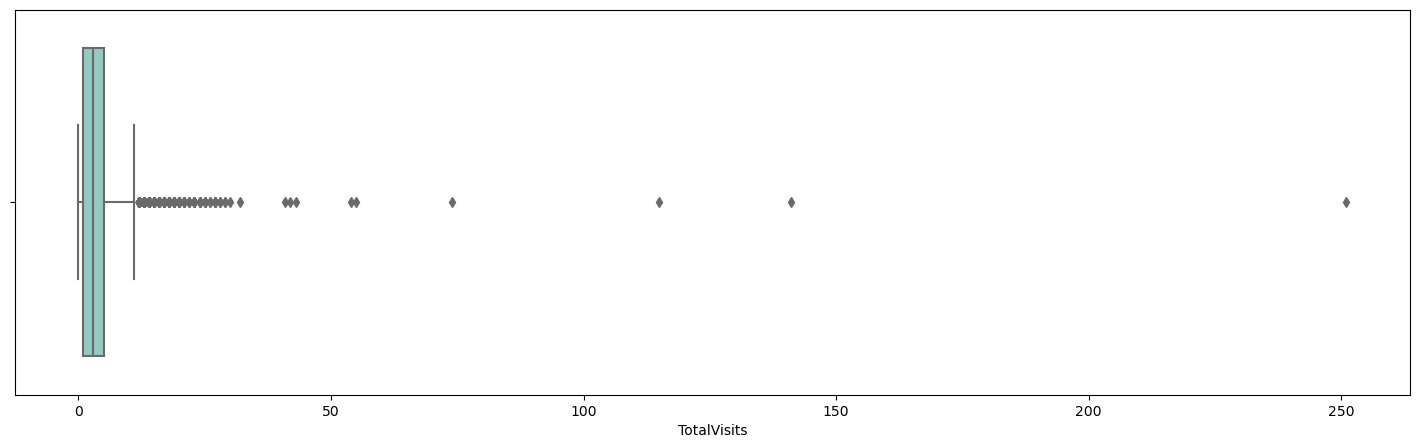

In [43]:
# Visualize "TotalVisits" Column to make some inferences

plt.figure(figsize = (18,5))
sns.boxplot(x = "TotalVisits", hue = "Converted", data = leads,palette = 'Set3')
plt.show()

##### As we can see there are some "Outliers" present in this "TotalVisits" column. Let's find out and remove them.


In [44]:
leads["TotalVisits"].describe(percentiles=[0.10,0.25, 0.50, 0.75, 0.90, 0.95, 0.97, 0.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
10%         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
97%        11.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [45]:
# To remove "Outliers", first calculate the 99th percentile value
percentile_99 = leads["TotalVisits"].quantile(0.99)

# Filter the DataFrame to remove outliers beyond the 99th percentile
leads = leads[leads["TotalVisits"] <= percentile_99]

# Check the updated statistics
leads["TotalVisits"].describe(percentiles=[0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.97, 0.99])


count    8991.000000
mean        3.217106
std         2.989530
min         0.000000
10%         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
97%        10.300000
99%        14.000000
max        17.000000
Name: TotalVisits, dtype: float64

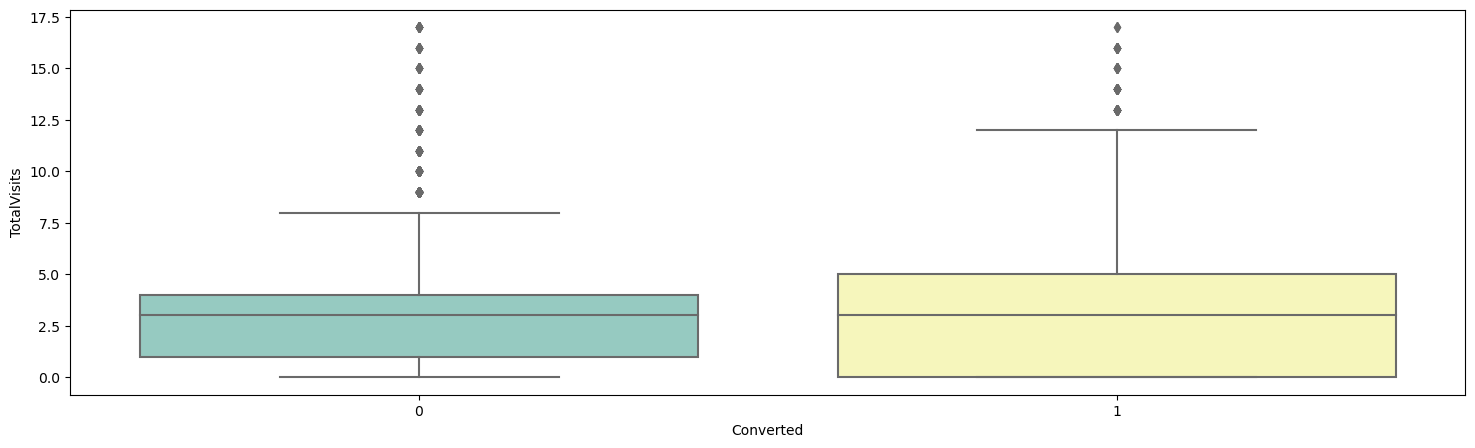

In [46]:
# Visualize "TotalVisits" Column to make some inferences
plt.figure(figsize = (18,5))
sns.boxplot(y = "TotalVisits", x = "Converted", data = leads,palette = 'Set3')
plt.show()

#### Inference : Converted and Not Converted both are visualized same, so we can't infer anything.

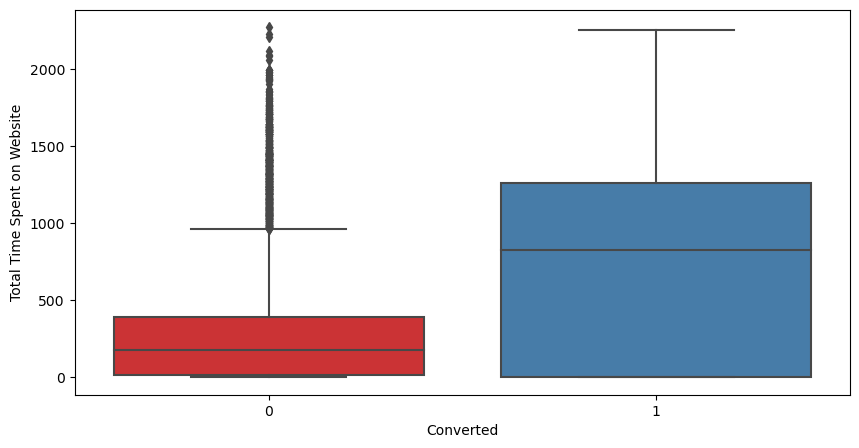

In [47]:
# Let's visualize "Total Time Spent on Website" Column to make some inferences
plt.figure(figsize = (10,5))
sns.boxplot(y = "Total Time Spent on Website", x = "Converted", data = leads,palette = 'Set1')
plt.show()

#### Inference : "Website visits" should be more focusable as its lead conversion rate in higher side.

In [48]:
leads["Page Views Per Visit"].describe(percentiles=[0.10,0.25, 0.50, 0.75, 0.90, 0.95, 0.97, 0.99])

count    8991.000000
mean        2.344587
std         2.061548
min         0.000000
10%         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
97%         7.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

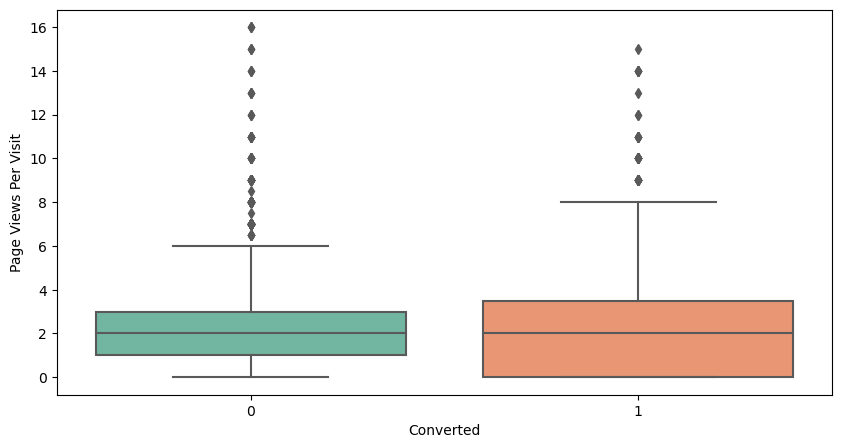

In [49]:
# Let's visualize "Page Views per visit" Column to make some inferences
plt.figure(figsize = (10,5))
sns.boxplot(y = "Page Views Per Visit", x = "Converted", data = leads,palette = 'Set2')
plt.show()

#### Inference : Nothing to infer, as both medians are almost same.

In [50]:
# Checking "Last Activity" column

leads["Last Activity"].value_counts()

Email Opened                    3410
SMS Sent                        2700
Olark Chat Conversation          970
Page Visited on Website          602
Converted to Lead                428
Email Bounced                    311
Email Link Clicked               266
Form Submitted on Website        115
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          24
View in browser link Clicked       5
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

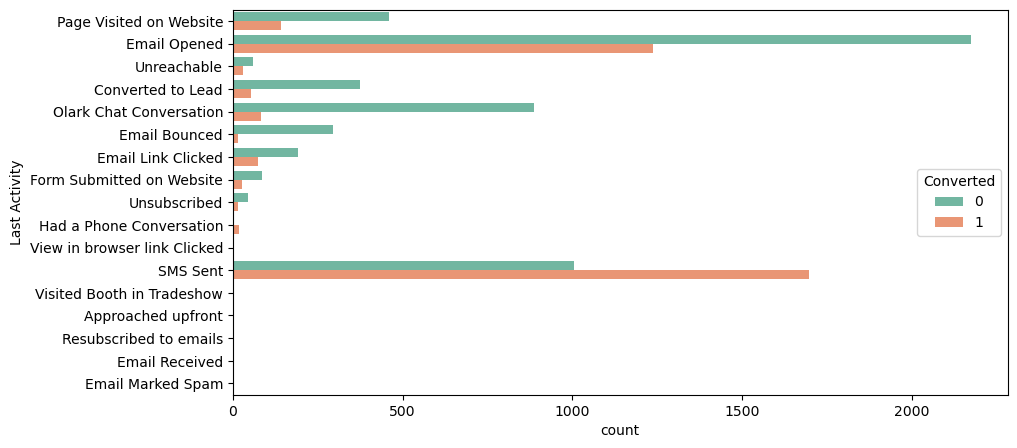

In [51]:
# Let's visualize "Last Activity" Column to make some inferences
plt.figure(figsize = (10,5))
sns.countplot(y = "Last Activity", hue = "Converted", data = leads,palette = 'Set2')
plt.show()

#### Inference : As per the value_count and visualization, we mark that "Email Opened" and "SMS Sent" are having higher lead conversion rate.

In [52]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

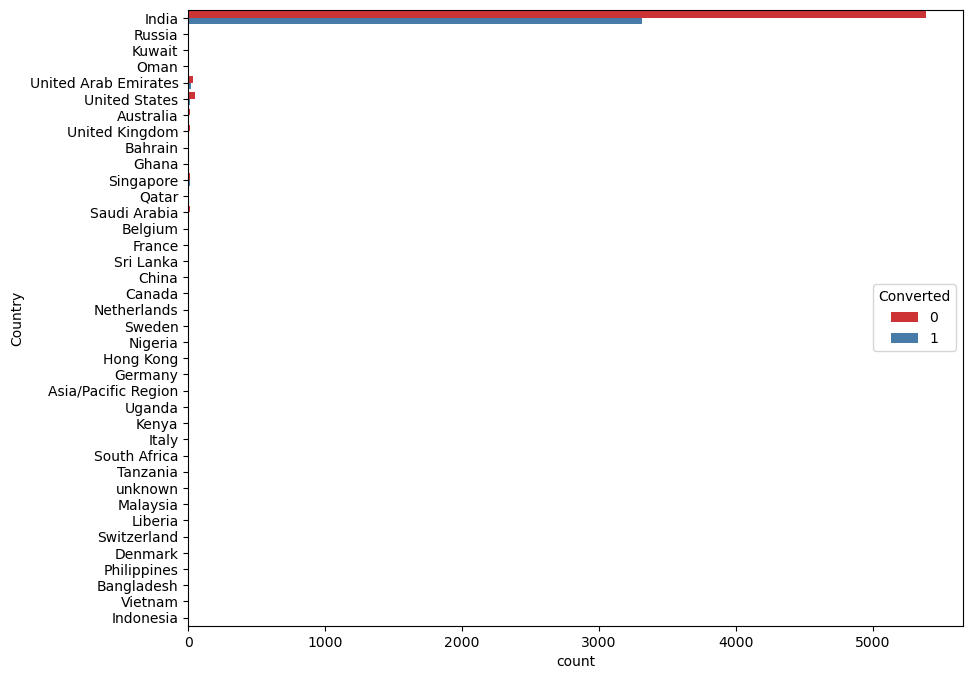

In [53]:
# Let's visualize "Country" Column to make some inferences
plt.figure(figsize = (10,8))
sns.countplot(y = "Country", hue = "Converted", data = leads,palette = 'Set1')
plt.show()

In [54]:
# Counts of every countries belong to every leads
Country_counts = leads["Country"].value_counts()
percentages = (Country_counts / len(leads)) * 100
print(percentages)

India                   96.841286
United States            0.756312
United Arab Emirates     0.578356
Singapore                0.266934
Saudi Arabia             0.233567
United Kingdom           0.166834
Australia                0.144589
Qatar                    0.111222
Hong Kong                0.077856
Bahrain                  0.077856
France                   0.066733
Oman                     0.066733
Germany                  0.044489
unknown                  0.044489
South Africa             0.044489
Nigeria                  0.044489
Kuwait                   0.044489
Canada                   0.044489
Sweden                   0.033367
China                    0.022244
Asia/Pacific Region      0.022244
Uganda                   0.022244
Bangladesh               0.022244
Italy                    0.022244
Belgium                  0.022244
Netherlands              0.022244
Ghana                    0.022244
Philippines              0.022244
Russia                   0.011122
Switzerland   

#### Inference : Only "India" is having the most targeted leads compare to others. Almost 97% leads belong to India.

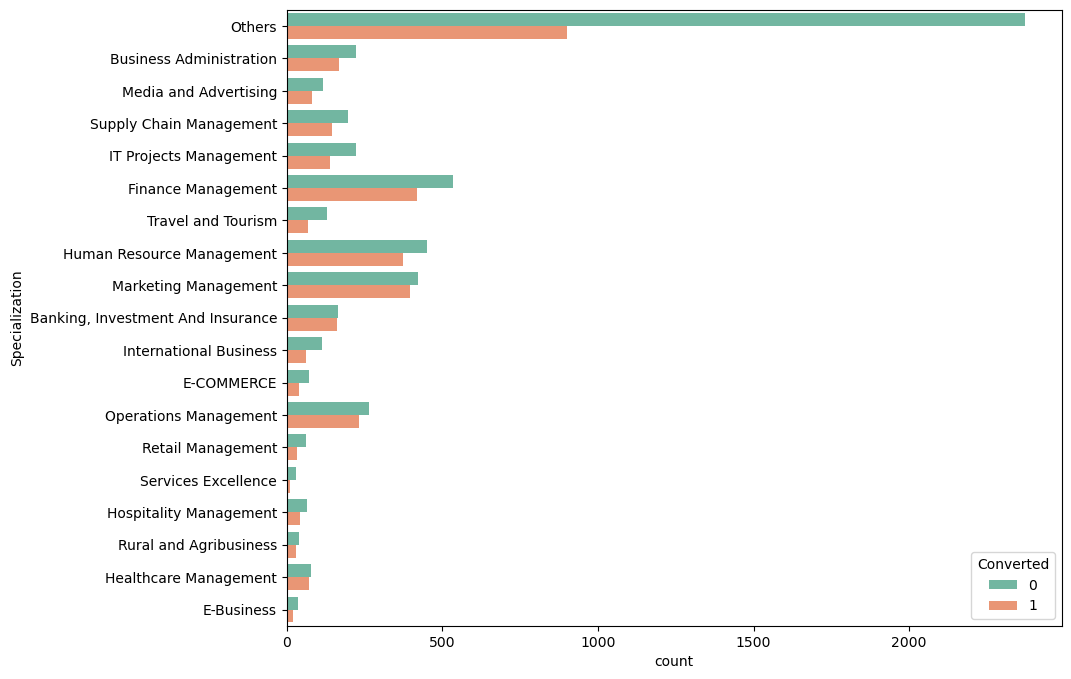

In [55]:
# Let's visualize "Specialization" Column to make some inferences
plt.figure(figsize = (10,8))
sns.countplot(y = "Specialization", hue = "Converted", data = leads,palette = 'Set2')
plt.show()

In [56]:
# Counts of every Specializations
Specialization_counts = leads["Specialization"].value_counts()
percentages = (Specialization_counts / len(leads)) * 100
print(round(percentages,2))

Others                               36.38
Finance Management                   10.58
Human Resource Management             9.18
Marketing Management                  9.10
Operations Management                 5.53
Business Administration               4.37
IT Projects Management                4.04
Supply Chain Management               3.81
Banking, Investment And Insurance     3.64
Media and Advertising                 2.21
Travel and Tourism                    2.19
International Business                1.94
Healthcare Management                 1.68
E-COMMERCE                            1.22
Hospitality Management                1.21
Retail Management                     1.08
Rural and Agribusiness                0.78
E-Business                            0.62
Services Excellence                   0.44
Name: Specialization, dtype: float64


#### Inference : Most Successful leads belong to "Other" category specialization. That means neither leads belong to any of these categories nor they are working anywhere. "Unemployed" should be targeted here.

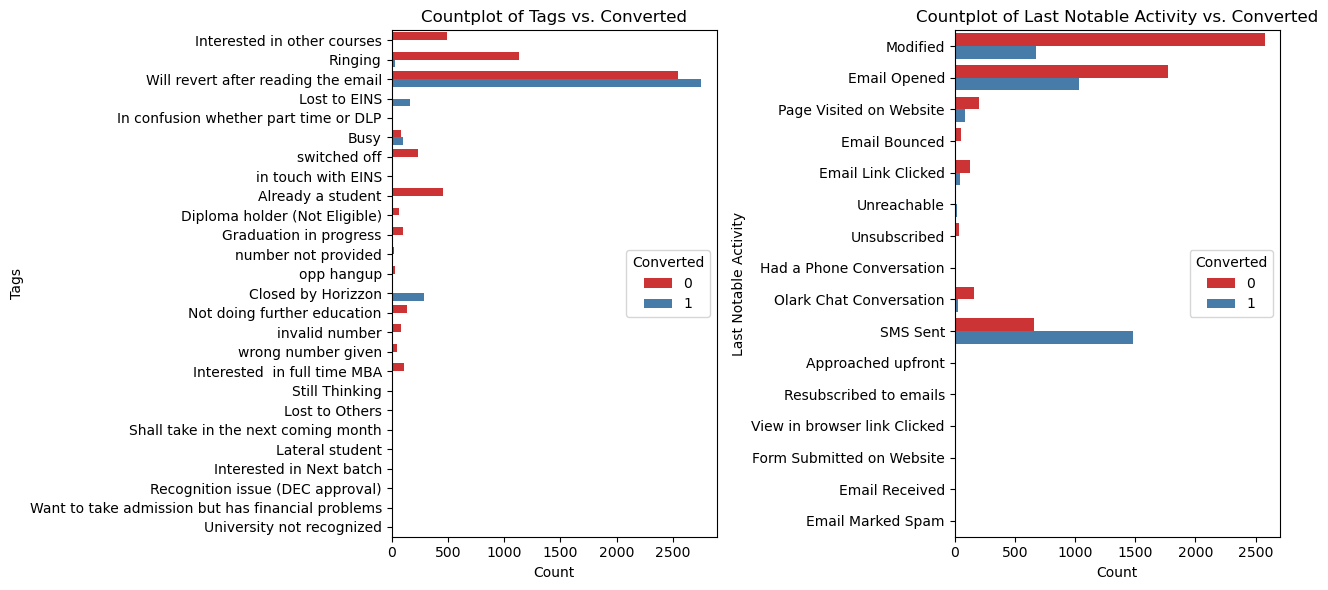

In [57]:
# Visualizing 'Tags' and 'Last Notable Activity'

fig, axes = plt.subplots(1, 2, figsize=(13 , 6))  

columns_to_visualize = ['Tags', 'Last Notable Activity']

for i, column in enumerate(columns_to_visualize):
    sns.countplot(data=leads, y=column, hue='Converted', ax=axes[i], palette='Set1')
    axes[i].set_title(f'Countplot of {column} vs. Converted')
    axes[i].set_ylabel(column)
    axes[i].set_xlabel('Count')

plt.tight_layout()
plt.show()


#### Inference : "Tags" : Lead conversion rate is higher after leads read the email. Mail should be more focusable area. 

#### Inference : "Last Notable Activity" : Most of the student leads are converted after they opened the email content and sms. Where the modified states that mostly non-targeted.

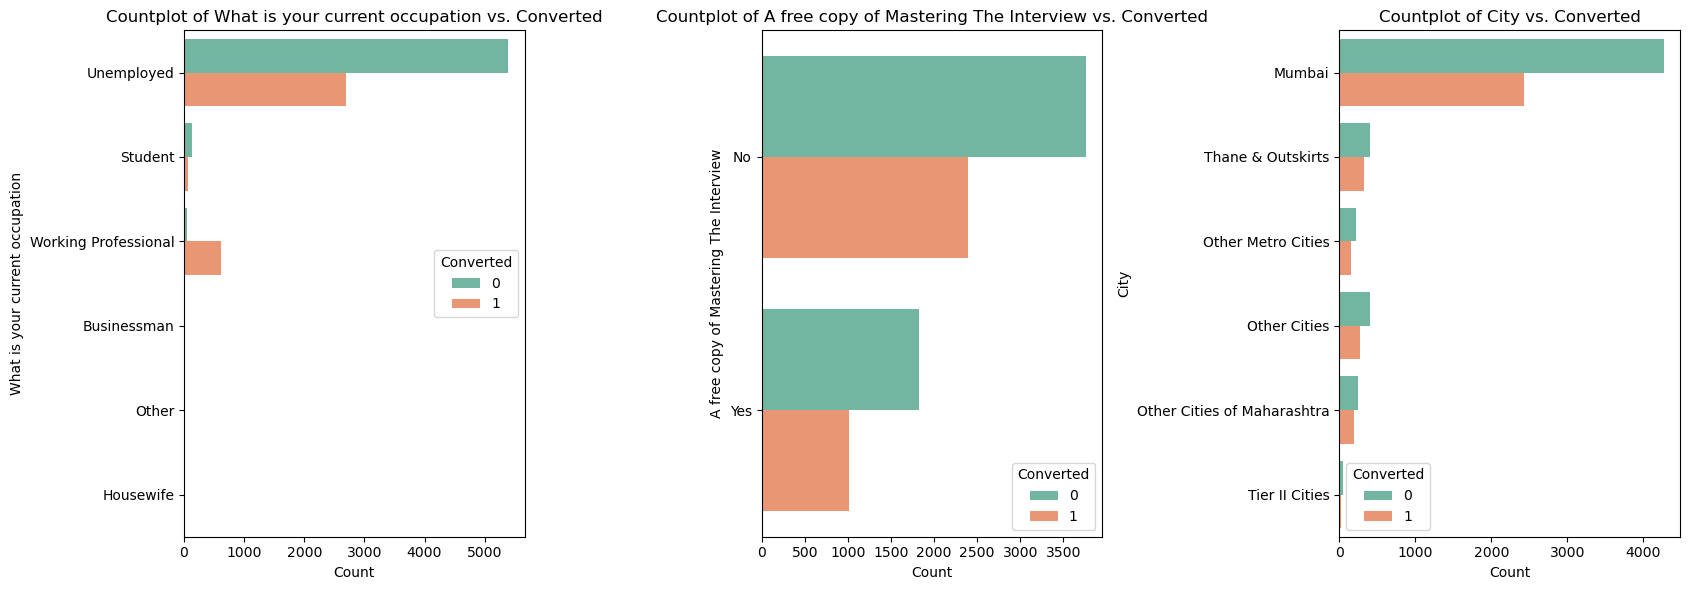

In [58]:
# Visualizing 'current occupation' and 'City', and  'free copy of Mastering The Interview'

fig, axes = plt.subplots(1, 3, figsize=(17, 6))  

columns_to_visualize = ['What is your current occupation', 'A free copy of Mastering The Interview', 'City']

for i, column in enumerate(columns_to_visualize):
    sns.countplot(data=leads, y=column, hue='Converted', ax=axes[i], palette='Set2')
    axes[i].set_title(f'Countplot of {column} vs. Converted')
    axes[i].set_ylabel(column)
    axes[i].set_xlabel('Count')

plt.tight_layout()
plt.show()


#### Inference 1 : "Unemployed" and "Working Professional" leads are more converted leads.

#### Inference 2 : "Free Mastering interview" copy is not much significant for lead conversion and non-conversion.

#### Inference 3 : "Mumbai" and its outskirts are having more lead conversion rate.

### Based on our analysis, we are dropping few columns those are not adding any information and it would be best for our Model building.

In [59]:
# dropping columns after Univariate analysis

leads = leads.drop(["Country","City","Last Notable Activity",'Lead Number',"Tags",'A free copy of Mastering The Interview'], axis=1)
leads.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed


In [60]:
# Checking lead conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.80447113780447

#### Currently the lead conversion rate is 38%

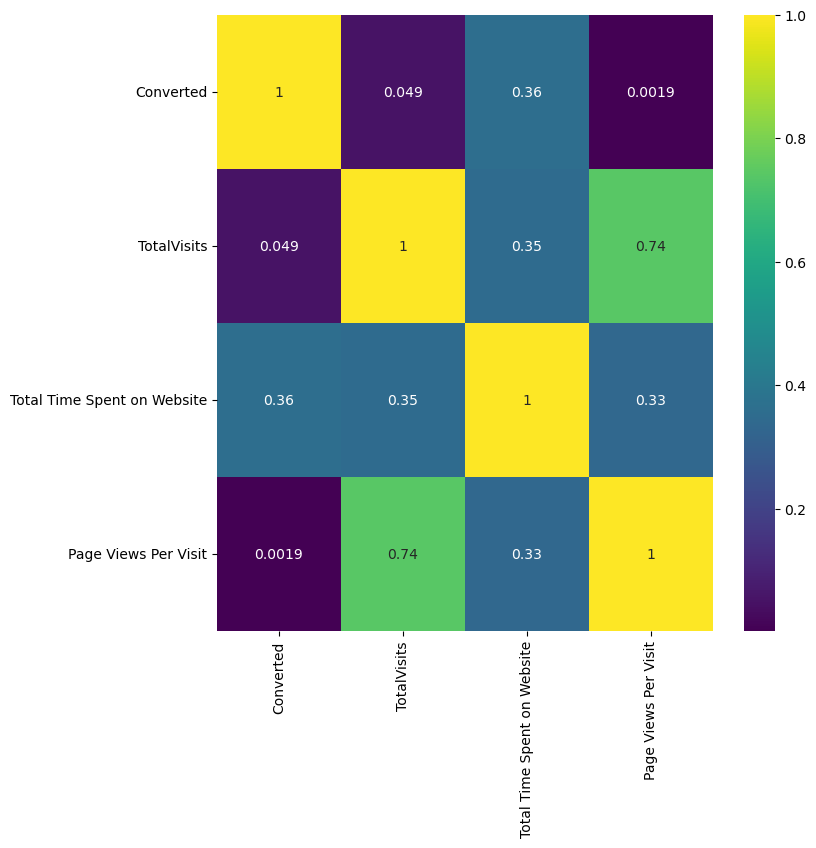

In [61]:
# Checking correlations of numeric variables using "heatmap"

plt.figure(figsize=(8,8))

sns.heatmap(leads.corr(), cmap="viridis", annot=True)
plt.show()

In [62]:
# Let's check the modified dataframe's shape and datatypes
print(leads.shape)
print(leads.info())

(8991, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      8991 non-null   object 
 1   Lead Origin                      8991 non-null   object 
 2   Lead Source                      8991 non-null   object 
 3   Converted                        8991 non-null   int64  
 4   TotalVisits                      8991 non-null   float64
 5   Total Time Spent on Website      8991 non-null   int64  
 6   Page Views Per Visit             8991 non-null   float64
 7   Last Activity                    8991 non-null   object 
 8   Specialization                   8991 non-null   object 
 9   What is your current occupation  8991 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 772.7+ KB
None


# Data Preparation 

In [63]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed


### Creating Dummy varibales for categorical varibales

In [64]:
leads_dummy = pd.get_dummies(leads[["Lead Origin", "Lead Source", "Last Activity", 
                              "Specialization", "What is your current occupation"]], drop_first=True)
leads_dummy.head(5)

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [65]:
## Removing columns by which the dummies were created

leads = leads.drop(["Lead Origin", "Lead Source", "Last Activity", 
                    "Specialization", "What is your current occupation"],axis=1)
leads.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0
4,3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,1.0


In [66]:
# Merging the dummy_data into main dataframe

leads = pd.concat([leads,leads_dummy],axis=1)
leads.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [67]:
# Assigning independent variables to X

X = leads.drop(['Prospect ID','Converted'], axis=1) # Prospect ID is unique ID which will not impact anything in model building
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [68]:
# Target variable to y

y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Train-Test Split

In [69]:
# Splitting the main dataset into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


### Feature Scaling


In [70]:
# Scaling the feature variables apart from dummy variables as its 0 and 1 only.

scaler = StandardScaler()

X_cols = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

X_train[X_cols] = scaler.fit_transform(X_train[X_cols])

X_train.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1467,0.246579,0.764873,0.777363,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
108,0.908719,-0.148599,0.298183,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7858,2.564067,-0.649536,-0.554758,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
5220,-1.077699,-0.881587,-1.139357,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3871,-1.077699,-0.881587,-1.139357,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


### Feature selection using RFE

In [71]:
# Applying RFE method to both X and y train data to get top features

logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)      
rfe = rfe.fit(X_train, y_train)

In [72]:
# Let's see the RFE's rank on every features

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 26),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 49),
 ('Lead Source_Direct Traffic', False, 13),
 ('Lead Source_Facebook', False, 46),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Live Chat', False, 23),
 ('Lead Source_NC_EDM', False, 18),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 14),
 ('Lead Source_Pay per Click Ads', False, 51),
 ('Lead Source_Press_Release', False, 9),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Social Media', False, 19),
 ('Lead Source_WeLearn', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 31),
 ('Lead Source_blog', False, 20),
 ('Lead Source_google', False, 12),
 ('Lead Source_testone', False, 43),
 ('Lead Source_welearnblog_Home', False, 28),
 (

In [73]:
# Selected features by RFE
RFE_col = X_train.columns[rfe.support_]
RFE_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional'],
      dtype='object')

# Model Building

### Assessing the Logistic Regression model with StatsModels

In [74]:
# Using statsmodels for Logistic Regressions
X_train_sm = sm.add_constant(X_train[RFE_col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2645.2
Date:                Mon, 18 Sep 2023   Deviance:                       5290.4
Time:                        21:45:16   Pearson chi2:                 6.63e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3834
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3774      0.126     -2.989      0.003      -0.625      -0.130
Total Time Spent on Website                              1.0998      0.040     27.803      0.000       1.022       1.177
Lead Origin_Landing Page Submission                     -1.0877      0.129     -8.417      0.000      -1.341      -0.834
Lead Origin_Lead Add Form                                1.9772      0.854      2.315      0.021       0.303       3.651
Lead Source_Olark Chat                                   1.1305      0.121      9.322      0.000       0.893       1.368
Lead Source_Reference                                    1.6766      0.888      1.888      0.059      -0.064       3.417
Lead Source_Welingak Website                             4.4050      1.328      3.317      0.001       1.802       7.008
Last Activity_Converted to Lead                         -1.0756      0.216     -4.976      0.000      -1.499      -0.652
Last Activity_Email Bounced                             -1.9834      0.339     -5.852      0.000      -2.648      -1.319
Last Activity_Form Submitted on Website                 -0.9434      0.347     -2.720      0.007      -1.623      -0.263
Last Activity_Had a Phone Conversation                   2.2255      0.626      3.554      0.000       0.998       3.453
Last Activity_Olark Chat Conversation                   -1.4828      0.167     -8.894      0.000      -1.810      -1.156
Last Activity_SMS Sent                                   1.2080      0.075     16.182      0.000       1.062       1.354
Specialization_Others                                   -1.1325      0.125     -9.068      0.000      -1.377      -0.888
What is your current occupation_Housewife               22.9961   1.74e+04      0.001      0.999   -3.41e+04    3.41e+04
What is your current occupation_Working Professional     2.7227      0.195     13.929      0.000       2.340       3.106
========================================================================================================================
"""

Dropping "What is your current occupation_Housewife" column as its having very high p-value.

In [75]:
RFE_col = RFE_col.drop("What is your current occupation_Housewife")

In [76]:
# Let's check the model again to evaluate high p-values
X_train_sm = sm.add_constant(X_train[RFE_col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2648.3
Date:                Mon, 18 Sep 2023   Deviance:                       5296.7
Time:                        21:45:16   Pearson chi2:                 6.64e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3828
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3739      0.126     -2.962      0.003      -0.621      -0.126
Total Time Spent on Website                              1.0985      0.040     27.800      0.000       1.021       1.176
Lead Origin_Landing Page Submission                     -1.0864      0.129     -8.411      0.000      -1.340      -0.833
Lead Origin_Lead Add Form                                1.9748      0.854      2.312      0.021       0.301       3.649
Lead Source_Olark Chat                                   1.1291      0.121      9.313      0.000       0.891       1.367
Lead Source_Reference                                    1.6940      0.888      1.908      0.056      -0.046       3.434
Lead Source_Welingak Website                             4.4062      1.328      3.318      0.001       1.804       7.009
Last Activity_Converted to Lead                         -1.0783      0.216     -4.990      0.000      -1.502      -0.655
Last Activity_Email Bounced                             -1.9861      0.339     -5.861      0.000      -2.650      -1.322
Last Activity_Form Submitted on Website                 -0.9467      0.347     -2.730      0.006      -1.626      -0.267
Last Activity_Had a Phone Conversation                   2.2215      0.626      3.548      0.000       0.994       3.449
Last Activity_Olark Chat Conversation                   -1.4842      0.167     -8.903      0.000      -1.811      -1.157
Last Activity_SMS Sent                                   1.2044      0.075     16.143      0.000       1.058       1.351
Specialization_Others                                   -1.1346      0.125     -9.087      0.000      -1.379      -0.890
What is your current occupation_Working Professional     2.7198      0.195     13.916      0.000       2.337       3.103
========================================================================================================================
"""

### Checking VIFs

In [77]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[RFE_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[RFE_col].values, i) for i in range(X_train[RFE_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,43.26
4,Lead Source_Reference,33.95
5,Lead Source_Welingak Website,10.50
12,Specialization_Others,2.08
3,Lead Source_Olark Chat,2.04
11,Last Activity_SMS Sent,1.61
1,Lead Origin_Landing Page Submission,1.53
10,Last Activity_Olark Chat Conversation,1.46
0,Total Time Spent on Website,1.28
13,What is your current occupation_Working Profes...,1.17


In [78]:
# Dropping columns are having high VIF values (<5)

RFE_col = RFE_col.drop("Lead Origin_Lead Add Form")

In [79]:
# Let's check the model again to evaluate high p-values
X_train_sm = sm.add_constant(X_train[RFE_col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6279
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.5
Date:                Mon, 18 Sep 2023   Deviance:                       5302.9
Time:                        21:45:16   Pearson chi2:                 6.64e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3822
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3373      0.125     -2.691      0.007      -0.583      -0.092
Total Time Spent on Website                              1.0951      0.039     27.773      0.000       1.018       1.172
Lead Origin_Landing Page Submission                     -1.1200      0.129     -8.712      0.000      -1.372      -0.868
Lead Source_Olark Chat                                   1.1140      0.121      9.219      0.000       0.877       1.351
Lead Source_Reference                                    3.6420      0.276     13.173      0.000       3.100       4.184
Lead Source_Welingak Website                             6.3650      1.023      6.224      0.000       4.361       8.369
Last Activity_Converted to Lead                         -1.0829      0.216     -5.015      0.000      -1.506      -0.660
Last Activity_Email Bounced                             -1.9883      0.339     -5.867      0.000      -2.652      -1.324
Last Activity_Form Submitted on Website                 -0.9580      0.347     -2.762      0.006      -1.638      -0.278
Last Activity_Had a Phone Conversation                   2.2125      0.626      3.533      0.000       0.985       3.440
Last Activity_Olark Chat Conversation                   -1.4906      0.167     -8.941      0.000      -1.817      -1.164
Last Activity_SMS Sent                                   1.2031      0.075     16.133      0.000       1.057       1.349
Specialization_Others                                   -1.1581      0.125     -9.297      0.000      -1.402      -0.914
What is your current occupation_Working Professional     2.7144      0.196     13.881      0.000       2.331       3.098
========================================================================================================================
"""

In [80]:
# Checking again the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[RFE_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[RFE_col].values, i) for i in range(X_train[RFE_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Specialization_Others,2.08
2,Lead Source_Olark Chat,2.04
10,Last Activity_SMS Sent,1.61
1,Lead Origin_Landing Page Submission,1.53
9,Last Activity_Olark Chat Conversation,1.46
0,Total Time Spent on Website,1.28
3,Lead Source_Reference,1.19
12,What is your current occupation_Working Profes...,1.17
5,Last Activity_Converted to Lead,1.11
4,Lead Source_Welingak Website,1.08


In [81]:
# dropping "Last Activity_Form Submitted on Website" column as high p-value
RFE_col = RFE_col.drop("Last Activity_Form Submitted on Website")

In [82]:
# Let's check the model again to evaluate high p-values
X_train_sm = sm.add_constant(X_train[RFE_col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6280
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2655.7
Date:                Mon, 18 Sep 2023   Deviance:                       5311.4
Time:                        21:45:17   Pearson chi2:                 6.63e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3814
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3856      0.124     -3.112      0.002      -0.628      -0.143
Total Time Spent on Website                              1.0949      0.039     27.799      0.000       1.018       1.172
Lead Origin_Landing Page Submission                     -1.0932      0.128     -8.565      0.000      -1.343      -0.843
Lead Source_Olark Chat                                   1.1139      0.121      9.219      0.000       0.877       1.351
Lead Source_Reference                                    3.6635      0.276     13.255      0.000       3.122       4.205
Lead Source_Welingak Website                             6.3679      1.022      6.228      0.000       4.364       8.372
Last Activity_Converted to Lead                         -1.0631      0.216     -4.929      0.000      -1.486      -0.640
Last Activity_Email Bounced                             -1.9680      0.338     -5.816      0.000      -2.631      -1.305
Last Activity_Had a Phone Conversation                   2.2347      0.626      3.569      0.000       1.008       3.462
Last Activity_Olark Chat Conversation                   -1.4728      0.166     -8.849      0.000      -1.799      -1.147
Last Activity_SMS Sent                                   1.2222      0.074     16.447      0.000       1.077       1.368
Specialization_Others                                   -1.1205      0.123     -9.077      0.000      -1.362      -0.879
What is your current occupation_Working Professional     2.7076      0.195     13.901      0.000       2.326       3.089
========================================================================================================================
"""

In [83]:
# Checking again the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[RFE_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[RFE_col].values, i) for i in range(X_train[RFE_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Others,2.08
2,Lead Source_Olark Chat,2.04
9,Last Activity_SMS Sent,1.60
1,Lead Origin_Landing Page Submission,1.50
8,Last Activity_Olark Chat Conversation,1.46
0,Total Time Spent on Website,1.28
3,Lead Source_Reference,1.19
11,What is your current occupation_Working Profes...,1.17
5,Last Activity_Converted to Lead,1.11
4,Lead Source_Welingak Website,1.08


### Finally all the variables have a good VIF and P-values. So we don't need to drop any more variables and we can proceed with making predictions using this model only.

### Predicting on Train Model

In [84]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred.head()

1467    0.964029
108     0.042521
7858    0.269899
5220    0.466225
3871    0.204653
dtype: float64

#### Comparing Actual vs Predicted probabilities


In [85]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.96402863, 0.04252108, 0.26989897, ..., 0.40147344, 0.20465326,
       0.9980586 ])

In [86]:
# Creating a dataframe with the actual values and the predicted values
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.964029,1467
1,0,0.042521,108
2,1,0.269899,7858
3,1,0.466225,5220
4,0,0.204653,3871


#### Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0

In [87]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.964029,1467,1
1,0,0.042521,108,0
2,1,0.269899,7858,0
3,1,0.466225,5220,0
4,0,0.204653,3871,0


#### Confusion matrix to evaluate the performance of the model

In [88]:
# Let's look at the confusion matrix  
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3518  408]
 [ 823 1544]]


In [89]:
# Let's check the overall accuracy.
round(100*(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)),4)

80.4386

## Sensitivity, Specificity, FPR, PPV, and NPV

Sensitivity, also known as recall or true positive rate, quantifies the model's capability to correctly identify all actual positive instances.

Specificity evaluates the model's accuracy in identifying true negative instances by measuring the proportion of correctly predicted negative instances among all actual negatives.

#### Let's check the other metrics [Sensitivity, Specificity, False Positive Rate (FPR), Postitive Predictive Value (PPV) and Negative Predictive Value (NPV)]

In [90]:
TP = confusion[1,1] # TP = true positive 
TN = confusion[0,0] # TN = true negatives
FP = confusion[0,1] # FP = false positives
FN = confusion[1,0] # FN = false negatives

In [91]:
# Sensitivity of logistic regression model
round(100*TP / float(TP+FN),4)

65.2302

In [92]:
# Specificity
round(100*TN / float(TN+FP),4)

89.6077

In [93]:
# False postive rate - predicting converted when lead does not have converted
round(100*(FP/ float(TN+FP)),4)

10.3923

In [94]:
# Positive predictive value 
round(100*(TP / float(TP+FP)),4)

79.0984

In [95]:
# Negative predictive value
round(100*(TN / float(TN+ FN)),4)

81.0412

#### We need to work on our thresold as "Sensitivity" value is little lower as compared to "Specificity".

## Plotting the ROC Curve 

- An ROC curve demonstrates the tradeoff between sensitivity and specificity.
- If ROC curve closer to the left handside and top border of ROC space, then our model would be more accurate.
- If ROC curve closer to the 45-degree diagonal of the ROC space, then our model would be less accurate.

In [96]:
# Let's plot the ROC curve now

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [97]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

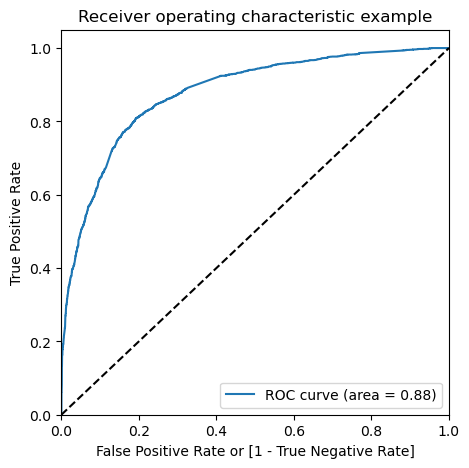

In [98]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Above figure shows our ROC curve is 0.88, so our model is a good one.

#### Finding the optimal cut-off point to get balanced sensitivity and specificity

In [99]:
# Creating different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.964029,1467,1,1,1,1,1,1,1,1,1,1,1
1,0,0.042521,108,0,1,0,0,0,0,0,0,0,0,0
2,1,0.269899,7858,0,1,1,1,0,0,0,0,0,0,0
3,1,0.466225,5220,0,1,1,1,1,1,0,0,0,0,0
4,0,0.204653,3871,0,1,1,1,0,0,0,0,0,0,0


In [100]:
# Let's calculate accuracy, sensitivity, and specificity for various probability cutoffs.
from sklearn.metrics import confusion_matrix

cutoffs = np.arange(0.0, 1.0, 0.1)  
results = []

for cutoff in cutoffs:
    y_pred = (y_train_pred_final['Converted_prob'] > cutoff).astype(int)  
    cm = confusion_matrix(y_train_pred_final['Converted'], y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    
    results.append([cutoff, accuracy, sensitivity, specificity])

cutoff_df = pd.DataFrame(results, columns=['prob', 'accuracy', 'sensitivity', 'specificity'])
print(cutoff_df)


   prob  accuracy  sensitivity  specificity
0   0.0  0.376132     1.000000     0.000000
1   0.1  0.587160     0.966624     0.358380
2   0.2  0.714921     0.924377     0.588640
3   0.3  0.795487     0.832277     0.773306
4   0.4  0.814238     0.766371     0.843097
5   0.5  0.804386     0.652302     0.896077
6   0.6  0.794216     0.580059     0.923332
7   0.7  0.780550     0.499789     0.949822
8   0.8  0.751947     0.384030     0.973765
9   0.9  0.719689     0.272919     0.989047


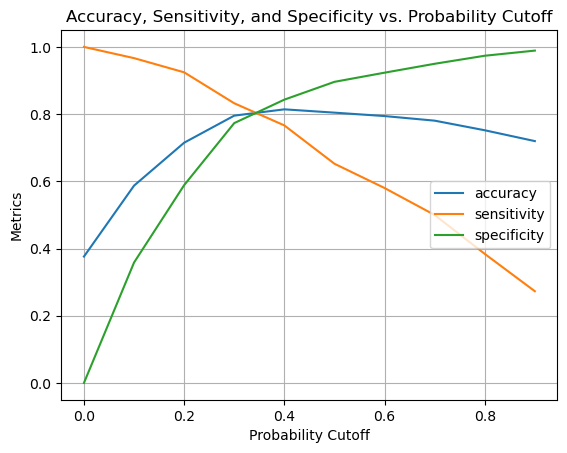

In [101]:
# Generating a graph to demonstrate the impact of varying probability thresholds on accuracy, sensitivity, and specificity.

cutoff_df.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])
plt.xlabel('Probability Cutoff')
plt.ylabel('Metrics')
plt.title('Accuracy, Sensitivity, and Specificity vs. Probability Cutoff')
plt.legend(loc='center right')
plt.grid()
plt.show()


### From the above curve, 0.36 is the optimum point to take it as a cutoff probability.

In [102]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.964029,1467,1,1,1,1,1,1,1,1,1,1,1
1,0,0.042521,108,0,1,0,0,0,0,0,0,0,0,0
2,1,0.269899,7858,0,1,1,1,0,0,0,0,0,0,0
3,1,0.466225,5220,1,1,1,1,1,1,0,0,0,0,0
4,0,0.204653,3871,0,1,1,1,0,0,0,0,0,0,0


In [103]:
# Let's check the overall accuracy again.

round(100*(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)),4)

80.8517

In [104]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion2

array([[3213,  713],
       [ 492, 1875]])

In [105]:
TP = confusion2[1,1] # TP = true positive 
TN = confusion2[0,0] # TN = true negatives
FP = confusion2[0,1] # FP = false positives
FN = confusion2[1,0] # FN = false negatives

In [106]:
# Sensitivity 
round(100*TP / float(TP+FN),4)

79.2142

In [107]:
# Specificity
round(100*TN / float(TN+FP),4)

81.839

In [108]:
# False postive rate - predicting converted when lead does not have converted
round(100*(FP/ float(TN+FP)),4)

18.161

In [109]:
# Positive predictive value 
round(100*(TP / float(TP+FP)),4)

72.4498

In [110]:
# Negative predictive value
round(100*(TN / float(TN+ FN)),4)

86.7206

## Precision and Recall

Precision is a metric that assesses the accuracy of positive predictions by measuring the proportion of correctly predicted positive instances among all instances predicted as positive.

Recall, also known as sensitivity or true positive rate, measures the model's ability to correctly identify all actual positive instances by calculating the proportion of true positives among all actual positives.

In [111]:
# Using sklearn for precision and recall

from sklearn.metrics import precision_score, recall_score

print("Precision Score =",round(100*(precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)),2))
print("Recall Score =",round(100*(recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)),2))

Precision Score = 72.45
Recall Score = 79.21


### Precision and Recall tradeoff

The precision-recall tradeoff is a key concept in binary classification, where adjusting the classification threshold influences the balance between precision (the accuracy of positive predictions) and recall (the ability to capture all actual positives). Increasing precision typically reduces recall, and vice versa, requiring a thoughtful choice of threshold based on the specific objectives and trade-offs of the problem.

In [112]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       1
 3       1
 4       0
 5       1
 6       0
 7       0
 8       0
 9       0
 10      0
 11      0
 12      0
 13      0
 14      0
 15      0
 16      0
 17      1
 18      0
 19      0
 20      0
 21      0
 22      0
 23      1
 24      1
 25      1
 26      0
 27      0
 28      1
 29      0
 30      0
 31      1
 32      0
 33      0
 34      0
 35      0
 36      0
 37      0
 38      0
 39      1
 40      1
 41      0
 42      0
 43      1
 44      1
 45      0
 46      1
 47      0
 48      1
 49      1
 50      0
 51      0
 52      1
 53      1
 54      1
 55      0
 56      0
 57      0
 58      0
 59      0
 60      0
 61      0
 62      0
 63      1
 64      1
 65      0
 66      0
 67      0
 68      1
 69      1
 70      0
 71      1
 72      0
 73      0
 74      0
 75      0
 76      1
 77      1
 78      1
 79      0
 80      0
 81      1
 82      1
 83      0
 84      0
 85      0
 86      0
 87      0
 88      0
 89      1
 90      0

In [113]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

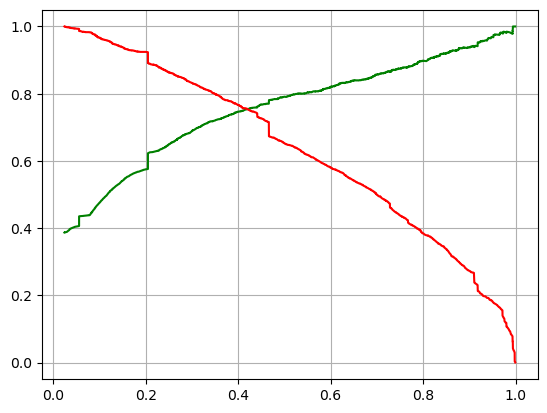

In [114]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.grid()
plt.show()

#### Precision-Recall tradeoff value is 0.41

#### Conclusion : We are taking Sensitivity-Specificity-Accuracy cutoff value 0.36 as optimum point as a cutoff probability as compared to Precision-Recall tradeoff value of 0.41.

## Predictions on Test Data

#### Feature Scaling on Test data

In [115]:
scaler = StandardScaler()

X_cols = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

X_test[X_cols] = scaler.fit_transform(X_test[X_cols])

X_test.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
8692,-0.044017,-0.334002,-0.383910,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
6126,-1.073713,-0.887592,-1.134419,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
5198,-0.044017,-0.113659,-0.383910,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4979,0.299215,0.680306,0.866939,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
9225,-0.387249,-0.752837,-0.133740,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [116]:
# Apply our final model on test data

X_test = X_test[RFE_col]

X_test_sm = sm.add_constant(X_test)

y_test_pred = res.predict(X_test_sm)

y_test_pred.head()

8692    0.349252
6126    0.917416
5198    0.167531
4979    0.829411
9225    0.013774
dtype: float64

In [117]:
type(y_test_pred)

pandas.core.series.Series

In [118]:
# Converting y_test_pred to a dataframe

y_test_pred =pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
8692,0.349252
6126,0.917416
5198,0.167531
4979,0.829411
9225,0.013774


In [119]:
# Putting CustID to an index

y_test_pred["Prospect ID"] = y_test_pred.index
y_test_pred.head()

,0,Prospect ID
8692,0.349252,8692
6126,0.917416,6126
5198,0.167531,5198
4979,0.829411,4979
9225,0.013774,9225


In [120]:
# Now converting y_test to a dataframe

y_test = pd.DataFrame(y_test)
y_test.head()

,Converted
8692,0
6126,1
5198,1
4979,1
9225,0


In [121]:
# Removing index for both actual and predicted dataframes 

y_test.reset_index(drop=True, inplace=True)
y_test_pred.reset_index(drop=True, inplace=True)

In [122]:
y_test.head()

,Converted
0,0
1,1
2,1
3,1
4,0


In [123]:
y_test_pred.head()

,0,Prospect ID
0,0.349252,8692
1,0.917416,6126
2,0.167531,5198
3,0.829411,4979
4,0.013774,9225


In [124]:
# Appending y_test and y_test_pred
y_test_pred_final = pd.concat([y_test, y_test_pred],axis=1)
y_test_pred_final.head()

,Converted,0,Prospect ID
0,0,0.349252,8692
1,1,0.917416,6126
2,1,0.167531,5198
3,1,0.829411,4979
4,0,0.013774,9225


In [125]:
# Renaming the "0" column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : "Converted_Prob"})
y_test_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.349252,8692
1,1,0.917416,6126
2,1,0.167531,5198
3,1,0.829411,4979
4,0,0.013774,9225


In [126]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(['Prospect ID', 'Converted', 'Converted_Prob'], axis=1)
y_test_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,8692,0,0.349252
1,6126,1,0.917416
2,5198,1,0.167531
3,4979,1,0.829411
4,9225,0,0.013774


In [127]:
# Put ROC curve's thresold value to get the final prediction of converted or not converted data

y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.36 else 0)
y_test_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,8692,0,0.349252,0
1,6126,1,0.917416,1
2,5198,1,0.167531,0
3,4979,1,0.829411,1
4,9225,0,0.013774,0


In [128]:
# Checking test data accuracy

round((100*metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)),4)

80.6894

In [129]:
confusion_final = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )
confusion_final

array([[1356,  310],
       [ 211,  821]])

In [130]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

In [131]:
# Sensitivity 
round(100*TP / float(TP+FN),4)

79.5543

In [132]:
# Specificity
round(100*TN / float(TN+FP),4)

81.3926

In [133]:
# Precision and Recall

Precision = round(100*(precision_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)),2)
Recall = round(100*(recall_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)),2)

print(Precision)
print(Recall)

72.59
79.55


In [134]:
# F1-Score to look at the performance of Precision and Recall together.
F1Score = 2*(Precision*Recall)/(Precision+Recall)
print(F1Score)

75.91079926383594


In [135]:
# Putting lead score on the test data
y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_test_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,8692,0,0.349252,0,35
1,6126,1,0.917416,1,92
2,5198,1,0.167531,0,17
3,4979,1,0.829411,1,83
4,9225,0,0.013774,0,1


In [136]:
y_test_pred_final.describe()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
count,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000
mean,4626.539659,0.382506,0.383018,0.419199,38.295033
std,2685.694135,0.486089,0.322019,0.493520,32.185751
min,0.000000,0.000000,0.004746,0.000000,0.000000
25%,2280.000000,0.000000,0.104418,0.000000,10.000000
50%,4661.000000,0.000000,0.259487,0.000000,26.000000
75%,6963.750000,1.000000,0.655542,1.000000,66.000000
max,9236.000000,1.000000,0.999407,1.000000,100.000000


In [137]:
# Create a copy of the "Lead_Score" column and sort it in descending order

AB = y_test_pred_final["Lead_Score"].copy()
AB.sort_values(ascending=False, inplace=True)

AB.head(10)


193     100
1757    100
2132    100
1828    100
1240    100
2639    100
1363    100
814     100
1168    100
378     100
Name: Lead_Score, dtype: int64

In [138]:
# Checking "Lead Score" greater than or equal to 80

hot_leads = y_test_pred_final.loc[y_test_pred_final["Lead_Score"]>=80]
hot_leads

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
1,6126,1,0.917416,1,92
3,4979,1,0.829411,1,83
8,7683,1,0.962253,1,96
14,2069,1,0.909383,1,91
18,2659,1,0.993397,1,99
25,2748,1,0.811725,1,81
28,1200,1,0.971570,1,97
29,8623,1,0.916747,1,92
32,9049,1,0.937578,1,94
33,2650,1,0.998046,1,100


In [139]:
# Sorting the filtered DataFrame by "Lead_Score" in descending order
hot_leads_sorted = hot_leads.sort_values(by="Lead_Score", ascending=False)

# Displaying the sorted DataFrame
hot_leads_sorted

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
1545,4955,1,0.995484,1,100
2396,8928,1,0.995829,1,100
2463,7215,1,0.996860,1,100
1440,4784,1,0.998046,1,100
2454,7420,1,0.997989,1,100
2100,6647,1,0.997199,1,100
1448,4773,1,0.998046,1,100
727,8090,1,0.998046,1,100
189,5785,1,0.998046,1,100
193,5784,1,0.998046,1,100


In [140]:
# Statistical summary of hot leads
hot_leads.describe()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
count,479.000000,479.000000,479.000000,479.0,479.000000
mean,4541.379958,0.883090,0.925960,1.0,92.592902
std,2589.306104,0.321649,0.061470,0.0,6.144633
min,12.000000,0.000000,0.795690,1.0,80.000000
25%,2337.500000,1.000000,0.877042,1.0,88.000000
50%,4540.000000,1.000000,0.928272,1.0,93.000000
75%,6950.000000,1.000000,0.985438,1.0,99.000000
max,9211.000000,1.000000,0.999407,1.0,100.000000


### There are 479 leads which are having "lead conversion rate" of greater than or equal to 80%

In [141]:
# Let's see the Prospect IDs of each hot leads
hot_leads_prospect_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_prospect_ids

array([6126, 4979, 7683, 2069, 2659, 2748, 1200, 8623, 9049, 2650, 8901,
       4540, 4838, 6792, 6379, 1299, 1588, 1552,  447, 3152, 1518, 5792,
       8330, 3188, 7227,  561, 8190, 7482, 4173,  243, 4337, 4359, 1203,
       2329,  211, 4008,  337, 9054, 5785, 5784, 2022, 1564, 7947,  356,
       3602, 3019, 1957,  622, 1946, 5638, 5022, 5075, 2296, 3845, 8990,
       4573, 8521, 7883, 5210, 4645, 6309, 5036, 8193, 2019, 6977, 4048,
        789, 2031, 4595, 2014, 2870, 8602, 4795, 4832, 6666, 5509, 5043,
       5646,  835, 8243, 3919, 4213,  374, 4187, 1500, 4778, 1311, 2812,
       4934, 2982,  405,  454, 7433, 4144, 7931, 4777, 6933, 3355,  493,
       6550, 3463, 6011, 5787,  802,  453, 6632,  507, 5644, 7245,  112,
       6728, 2392, 8562, 3180, 7166, 4191, 5975, 3031, 5817, 4253, 7334,
       4776, 2631, 2770, 2940, 6947, 4330, 7902, 1290, 5695, 1079, 1350,
       1267, 7340, 7450, 7566, 1928, 6094, 8090, 2630, 5562, 4004, 8117,
       1566, 5307, 1304, 7606, 5575, 2055, 5414, 45

In [142]:
# Features used for final model
print("Top features for building the best model")
res.params.sort_values(ascending=False)

Top features for building the best model


Lead Source_Welingak Website                            6.367897
Lead Source_Reference                                   3.663536
What is your current occupation_Working Professional    2.707551
Last Activity_Had a Phone Conversation                  2.234673
Last Activity_SMS Sent                                  1.222154
Lead Source_Olark Chat                                  1.113905
Total Time Spent on Website                             1.094917
const                                                  -0.385572
Last Activity_Converted to Lead                        -1.063116
Lead Origin_Landing Page Submission                    -1.093208
Specialization_Others                                  -1.120530
Last Activity_Olark Chat Conversation                  -1.472820
Last Activity_Email Bounced                            -1.968026
dtype: float64

### Let's compare our model in Train and Test dataset

#### Train Data 
- Accuracy - 80.85
- Sensitivity - 79.21
- Specificity - 81.83

#### Test Data 
- Accuracy - 80.68
- Sensitivity - 79.55
- Specificity - 81.39

- The lead scoring on the test dataset
yielded an impressive conversion rate
and there are 479 leads which are
having "lead conversion rate" of
greater than or equal to 80%.


- A high sensitivity value in our model
enhances our ability to identify the
most promising leads, aligning with
our conversion optimization goals.

- Notably, the features with the most
substantial contributions to the
probability of lead conversion are
identified as Welingak Website,
Reference source, Working
Professional , Phone Conversation,
SMS, underlining their significance in
the conversion prediction process.

### Recommendations

Prospective leads demonstrating above-average website engagement durations exhibit a propitious inclination towards
conversion, warranting strategic outreach for increased lead conversions.

- The Welingak website emerges as a prime focus for cultivating affirmative conversion prospects, underlining its
instrumental role in lead generation.
- Reference leads stand as a commendable reservoir for bolstering lead conversion endeavors, substantiating their
intrinsic value in the conversion ecosystem.
- The judicious deployment of SMS messaging and Olark chat functionalities can wield a substantial influence on the
augmentation of lead conversions.
- The efficacy of the sales team's direct communication endeavors, particularly via telephone outreach, is underscored by
the notably elevated phone conversion rates observed within the ambit of favorable leads.
- Focusing targeting efforts on the cadre of working professionals and unemployed leads, who display a proclivity
towards pursuing educational courses, emerges as a promising avenue for fostering positive lead conversions.